In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw

In [6]:
bot = np.genfromtxt('stitch_bot_.csv', delimiter = ',', skip_header=True)
bot_gt = np.genfromtxt('stitch_bot_gt.csv', delimiter = ',', skip_header=True)

top = np.genfromtxt('stitch_top_.csv', delimiter = ',', skip_header=True)
top_gt = np.genfromtxt('stitch_top_gt.csv', delimiter = ',', skip_header=True)

src_pts_1 = np.float32([(-top[:,1],top[:,0])]).reshape(-1,1,2)
dst_pts_1 = np.float32([(-top_gt[:,1],top_gt[:,0])]).reshape(-1,1,2)

src_pts_2 = np.float32([(-bot[:,1]-100,bot[:,0]-100)]).reshape(-1,1,2)
dst_pts_2 = np.float32([(bot_gt[:,1],bot_gt[:,0])]).reshape(-1,1,2)

M_1, _ = cv2.findHomography(src_pts_1, dst_pts_1, cv2.RANSAC,5.0)

M_2, _ = cv2.findHomography(src_pts_2, dst_pts_2, cv2.RANSAC,5.0)

In [132]:
pts = [(0,0),(800,0),(0,600),(800,600),(469,518),(592,239),(186,324),(316,73),(475,340),(594,81),(160,499),(308,225)]

pts = np.float32(pts).reshape(-1,1,2)

dst1 = cv2.perspectiveTransform(pts,M_1)
dst2 = cv2.perspectiveTransform(pts,M_2)

ys1 = dst1[:,0,0]
xs1 = dst1[:,0,1]

ys2 = dst2[:,0,0]
xs2 = dst2[:,0,1]

t1 = np.zeros((len(pts[:,0]),2))
t1[:,0], t1[:,1] = dst1[:,0,0],  dst1[:,0,1]

t2 = np.zeros((len(pts[:,0]),2))
t2[:,0], t2[:,1] = dst2[:,0,0],  dst2[:,0,1]

# top
x0min, x0max = int(np.min(xs1)), int(np.max(xs1))
y0min, y0max = int(np.min(ys1)), int(np.max(ys1))

# bot
x1min, x1max = int(np.min(xs2)), int(np.max(xs2))
y1min, y1max = int(np.min(ys2)), int(np.max(ys2))

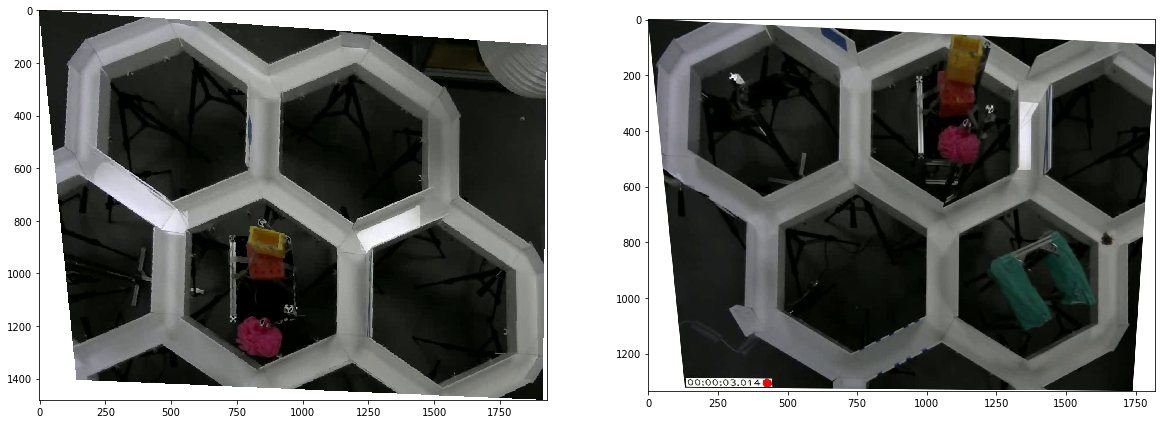

True

In [153]:
img1 = cv2.imread('im_0.png')
img2 = cv2.imread('im_1.png')

out1 = cv2.warpPerspective(img1, M_1, (2200,2200), cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, borderValue = (255,255,255))
out2 = cv2.warpPerspective(img2, M_2, (2200,2200), cv2.INTER_LINEAR, cv2.BORDER_REPLICATE, borderValue = (255,255,255))

out1 = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
out2 = cv2.cvtColor(out2, cv2.COLOR_BGR2RGB)

out1 = out1[x0min:x0max,y0min:y0max]
out2 = out2[x1min:x1max,y1min:y1max]

fig, ax = plt.subplots(1, 2, figsize = (20,20))
ax[0].imshow(out1)
ax[1].imshow(out2)
plt.show()

cv2.imwrite('out1.png', out1)
cv2.imwrite('out2.png', out2)

In [164]:
mean_x = np.mean([t1[4,0]-t2[5,0],t1[6,0]-t2[7,0],t1[8,0]-t2[9,0],t1[10,0]-t2[11,0]])
mean_y = np.mean([t1[4,1]-t2[5,1],t1[6,1]-t2[7,1],t1[8,1]-t2[9,1],t1[10,1]-t2[11,1]])

y_off = int(abs(mean_x))
x_off = int(abs(mean_y))
print(x_off, y_off)

# x_off = 606
# y_off = 264

587 264


In [138]:
top1 = np.genfromtxt('overlap_top.csv', delimiter = ',', skip_header=True)[:,0:2]
bot1 = np.genfromtxt('overlap_bot.csv', delimiter = ',', skip_header=True)[:,0:2]

top2 = top1.reshape(-1,1,2)
bot2 = bot1.reshape(-1,1,2)

dst1 = cv2.perspectiveTransform(top2,M_1)
dst2 = cv2.perspectiveTransform(bot2,M_2)

top = np.zeros_like(top1)
bot = np.zeros_like(bot1)

top[:,0], top[:,1] = dst1[:,0,0], dst1[:,0,1]
bot[:,0], bot[:,1] = dst2[:,0,0], dst2[:,0,1]

# top[:,0] += y_off
# bot[:,1] += x_off

# plt.plot(top[:,0], top[:,1], 'o', color='blue')
# plt.plot(bot[:,0], bot[:,1], 'o', color='red')

src_pts_1 = np.float32([bot[:,0], bot[:,1]]).reshape(-1,1,2)
dst_pts_1 = np.float32([top[:,0], top[:,1]]).reshape(-1,1,2)

H, _ = cv2.findHomography(src_pts_1, dst_pts_1, cv2.RANSAC,5.0)

bot_n = bot.reshape(-1,1,2)

dst_n = cv2.perspectiveTransform(bot_n,H)

bot = np.zeros_like(bot1)
bot[:,0], bot[:,1] = dst_n[:,0,0], dst_n[:,0,1]


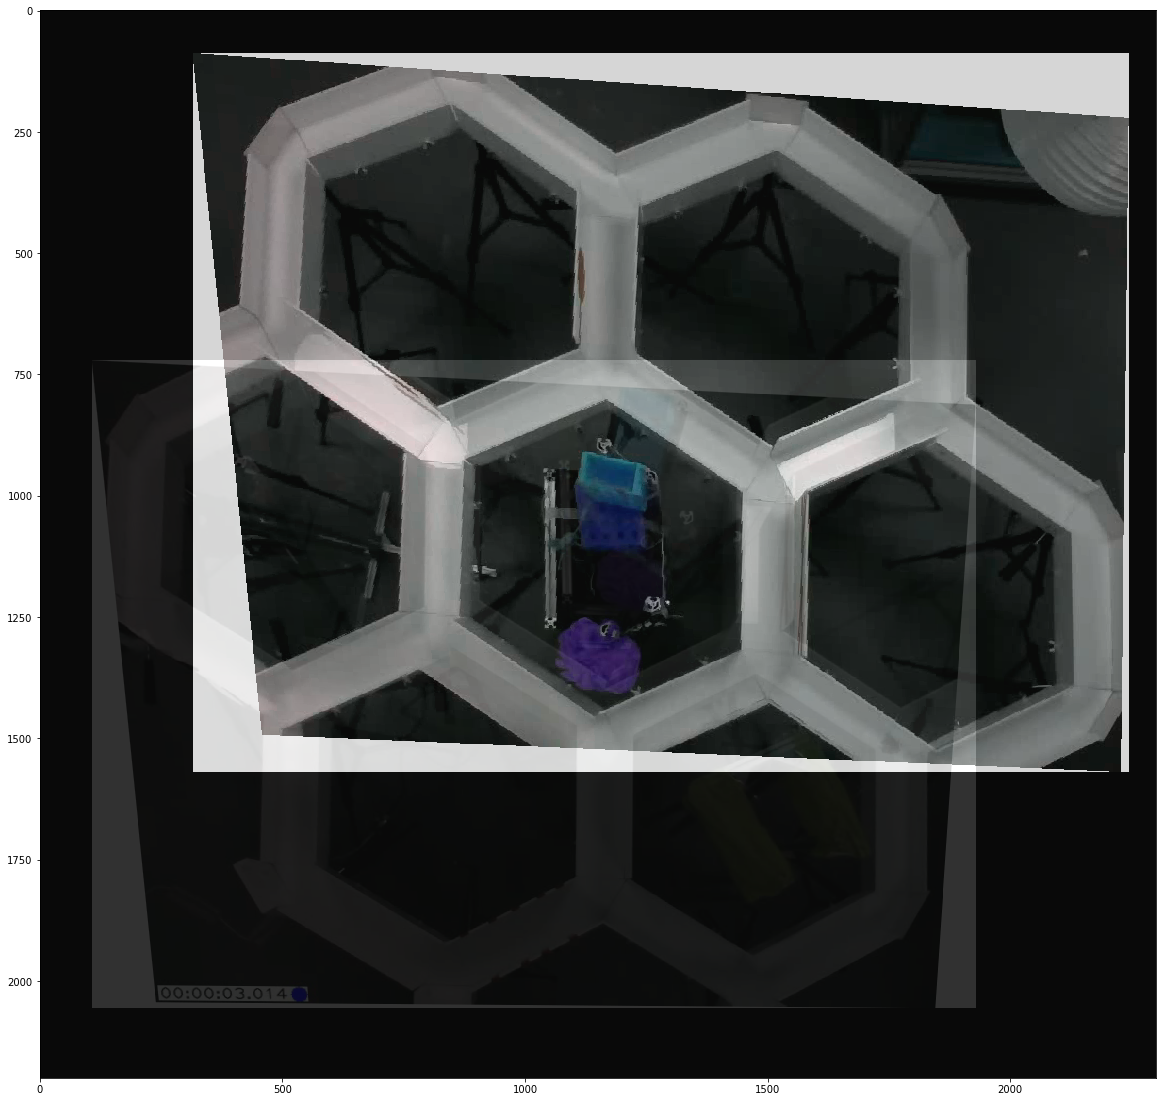

In [166]:
im1 = plt.imread('out1.png',0)
im2 = plt.imread('out2.png',0)

fig1 = np.full((2200,2300,3), fill_value=0,  dtype='uint8')
fig2 = np.full((2200,2300,3), fill_value=0,  dtype='uint8')
fig1[x0min:x0max,y0min+y_off:y0max+y_off] = im1
fig2[x1min+x_off:x1max+x_off,y1min:y1max] = im2

fig, ax = plt.subplots(figsize = (20,20))
ax.imshow(fig2, alpha = 50)
ax.imshow(fig1, alpha=50)

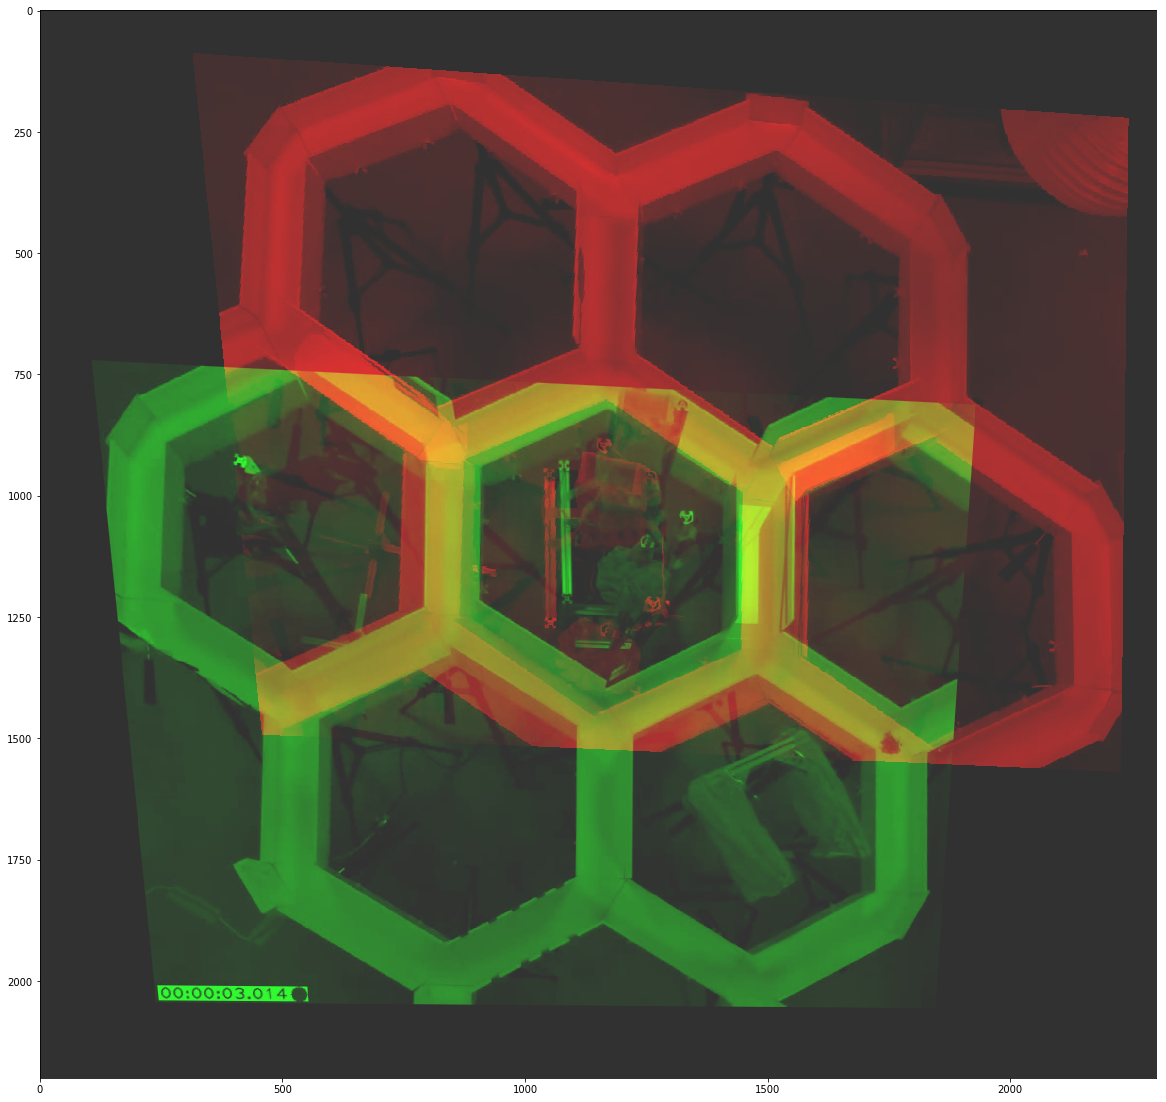

In [165]:
im1 = plt.imread('out1.png',0)
im2 = plt.imread('out2.png',0)

fig1 = np.full((2200,2300,3), fill_value=0,  dtype='uint8')

fig1[x0min:x0max,y0min+y_off:y0max+y_off,0] = img1Gray
fig1[x1min+x_off:x1max+x_off,y1min:y1max,1] = img2Gray

fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(fig1, alpha=50)

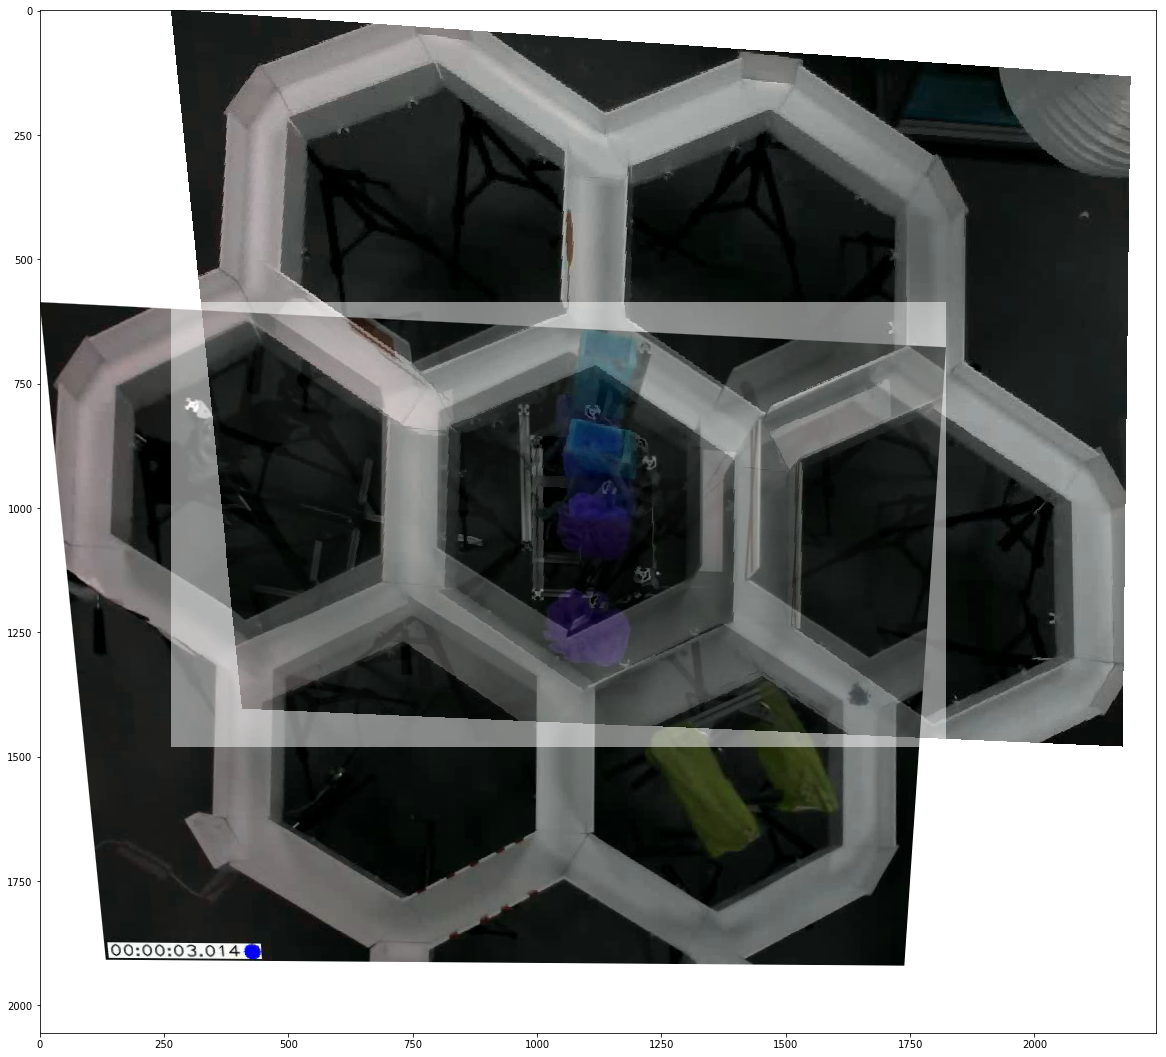

In [167]:
# suppose img1 and img2 are your two images
img1 = Image.open('out1.png')
img2 = Image.open('out2.png')

# paste img1 on top of img2
newimg1 = Image.new('RGBA', size=(y0max+y_off, x1max+x_off), color=(0, 0, 0, 0))
newimg1.paste(img2, (0,x_off))
newimg1.paste(img1, (y_off, 0))

# paste img2 on top of img1
newimg2 = Image.new('RGBA', size=(y0max+y_off, x1max+x_off), color=(0, 0, 0, 0))
newimg2.paste(img1, (y_off, 0))
newimg2.paste(img2, (0,x_off))

# blend with alpha=0.5
result = Image.blend(newimg1, newimg2, alpha=0.5)

fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(result)